# Detection pour le quadripede

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import math

In [2]:
data = np.loadtxt("Marche_Train.txt")

Le code suivant sert à réaliser la création de la base de données pour les pas d'un quadripède à partir des pas enregistrés pour un bipède (Homme), pour cela nous aons détecté dans un pas quelle jambe avançai et quelle jambe reculai grace à la différence entre les 2 signaux. Nous avons ensuite séparé les 2 signaux du pas afin de les stocker dans des tableaux prévu à cet effet. On répète la même opération avec un autre pas de nos données puis à partir de ces quatres signaux nous pouvons créer les 6 positions que peuvent prendre les pattes d'un quadripède. Une fois l'opération répètée pour chaque couple de pas de nos données d'entrée nous avons une base de données contenant des pas d'un quadripède.

Positions créées par notre code:

Position 1 : ![Position 1](img/PasCas0.png) 


Position 2 : ![Position 2](img/PasCas1.png) 


Position 3 : ![Position 3](img/PasCas2.png)


Position 4 : ![Position 4](img/PasCas3.png) 


Position 5 : ![Position 5](img/PasCas4.png) 


Position 6 : ![Position 6](img/PasCas5.png)

In [3]:
def create_dataset(data,liste):
    data2 = np.zeros((int(data.shape[0]/40),40,3), dtype = 'i')
    up1 = np.zeros((40), dtype = 'i')
    up2 = np.zeros((40), dtype = 'i')
    down1 = np.zeros((40), dtype = 'i')
    down2 = np.zeros((40), dtype = 'i')
    liste2 = []
    for i in range(int(data.shape[0]/40)):
        for j in range(40):
            data2[i,j,0] = data[i*40+j,0]
            data2[i,j,1] = data[i*40+j,1]
            data2[i,j,2] = data[i*40+j,2]
    
    for i in range(data2.shape[0]):
        if data2[i,1,2]-data2[i,0,2]<0:
            up1 = data2[i,:,1]
            down1 = data2[i,:,0]
        else:
            up1 = data2[i,:,0]
            down1 = data2[i,:,1]
        
        for j in range(i,data2.shape[0]):
            if data2[j,1,2]-data2[j,0,2]<0:
                up2 = data2[j,:,1]
                down2 = data2[j,:,0]
            else:
                up2 = data2[j,:,0]
                down2 = data2[j,:,1]
            
            buff = np.append(up1,down1,axis=0)
            buff = np.append(buff,up2,axis=0)
            buff = np.append(buff,down2,axis=0)
            buff = np.append(buff,np.array([0],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
            buff = np.append(down1,up1,axis=0)
            buff = np.append(buff,down2,axis=0)
            buff = np.append(buff,up2,axis=0)
            buff = np.append(buff,np.array([1],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
            buff = np.append(up1,down1,axis=0)
            buff = np.append(buff,down2,axis=0)
            buff = np.append(buff,up2,axis=0)
            buff = np.append(buff,np.array([2],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
            buff = np.append(down1,up1,axis=0)
            buff = np.append(buff,up2,axis=0)
            buff = np.append(buff,down2,axis=0)
            buff = np.append(buff,np.array([3],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
            buff = np.append(up1,up2,axis=0)
            buff = np.append(buff,down1,axis=0)
            buff = np.append(buff,down2,axis=0)
            buff = np.append(buff,np.array([4],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
            buff = np.append(down1,down2,axis=0)
            buff = np.append(buff,up1,axis=0)
            buff = np.append(buff,up2,axis=0)
            buff = np.append(buff,np.array([5],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)

Création des fichiers de test pour l'application:

In [4]:
def create_testFiles(data):
    data2 = np.zeros((int(data.shape[0]/40),40,3), dtype = 'i')
    up1 = np.zeros((40), dtype = 'i')
    up2 = np.zeros((40), dtype = 'i')
    down1 = np.zeros((40), dtype = 'i')
    down2 = np.zeros((40), dtype = 'i')
    
    fichierA = open("pasA.txt", "a")
    
    fichierB = open("pasB.txt", "a")
    
    fichierC = open("pasC.txt", "a")
    
    for i in range(int(data.shape[0]/40)):
        for j in range(40):
            data2[i,j,0] = data[i*40+j,0]
            data2[i,j,1] = data[i*40+j,1]
            data2[i,j,2] = data[i*40+j,2]
    
    for i in range(10):
        if data2[i,1,2]-data2[i,0,2]<0:
            up1 = data2[i,:,1]
            down1 = data2[i,:,0]
        else:
            up1 = data2[i,:,0]
            down1 = data2[i,:,1]
        
        for j in range(i,10):
            if data2[j,1,2]-data2[j,0,2]<0:
                up2 = data2[j,:,1]
                down2 = data2[j,:,0]
            else:
                up2 = data2[j,:,0]
                down2 = data2[j,:,1]
            
            for k in range(40):
                fichierA.write(str(up1[k]) + " " + str(down1[k]) + " " + str(up2[k]) + " " + str(down2[k]) + "\n")
            
            for k in range(40):
                fichierA.write(str(down1[k]) + " " + str(up1[k]) + " " + str(down2[k]) + " " + str(up2[k]) + "\n")
            
            for k in range(40):
                fichierB.write(str(up1[k]) + " " + str(down1[k]) + " " + str(down2[k]) + " " + str(up2[k]) + "\n")
            
            for k in range(40):
                fichierB.write(str(down1[k]) + " " + str(up1[k]) + " " + str(up2[k]) + " " + str(down2[k]) + "\n")
        
            for k in range(40):
                fichierC.write(str(up1[k]) + " " + str(up2[k]) + " " + str(down1[k]) + " " + str(down2[k]) + "\n")
            
            for k in range(40):
                fichierC.write(str(down1[k]) + " " + str(down2[k]) + " " + str(up1[k]) + " " + str(up2[k]) + "\n")
            
    fichierA.close()
    fichierB.close()
    fichierC.close()

In [5]:
liste = []
create_dataset(data,liste)

In [6]:
create_testFiles(data)

In [7]:
data = np.loadtxt("Course_Train.txt")
create_dataset(data,liste)
print(len(liste))

378768


In [8]:
data = np.array(liste)
features = data[:,:-1]
labels = data[:,-1:]
labels = labels.reshape((-1,))
print(features.shape)

(378768, 160)


On sépare la base de données créée préalablement en 3 bases de données pour l'entrainement, le test et la validation de notre réseau.

In [9]:
def split_data(features, labels):
    i = int((features.shape[0]*7)/10)
    j = int((features.shape[0]*2)/10)
    k = int((features.shape[0])/10)
    features_train = features[:i,:]
    features_train = features_train.reshape((features_train.shape[0],40,4,1))
    labels_train = labels[:i]
    features_test = features[i:i+j,:]
    features_test = features_test.reshape((features_test.shape[0],40,4,1))
    labels_test = labels[i:i+j]
    features_valid = features[-k:,:]
    features_valid = features_valid.reshape((features_valid.shape[0],40,4,1))
    labels_valid = labels[-k:]
    
    return (features_train,labels_train),(features_test,labels_test),(features_valid,labels_valid)

In [10]:
train, test, valid = split_data(features, labels)

In [11]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell

On créer et entraine notre réseau de neurones à partir d'un modèle convolutionnel.

Instructions for updating:
Use the retry module or similar alternatives.
 Epoch : 0  Loss:  1.7882229  Accuracy:  0.206  Accuracy Test:  0.252
 Epoch : 1  Loss:  1.7845447  Accuracy:  0.258  Accuracy Test:  0.282
 Epoch : 2  Loss:  1.7865863  Accuracy:  0.218  Accuracy Test:  0.294
 Epoch : 3  Loss:  1.7767974  Accuracy:  0.282  Accuracy Test:  0.274
 Epoch : 4  Loss:  1.7622339  Accuracy:  0.336  Accuracy Test:  0.298
 Epoch : 5  Loss:  1.7648095  Accuracy:  0.282  Accuracy Test:  0.318
 Epoch : 6  Loss:  1.7453598  Accuracy:  0.346  Accuracy Test:  0.272
 Epoch : 7  Loss:  1.7281684  Accuracy:  0.32  Accuracy Test:  0.34
 Epoch : 8  Loss:  1.7218591  Accuracy:  0.326  Accuracy Test:  0.436
 Epoch : 9  Loss:  1.6755743  Accuracy:  0.432  Accuracy Test:  0.446
 Epoch : 10  Loss:  1.64023  Accuracy:  0.448  Accuracy Test:  0.484
 Epoch : 11  Loss:  1.6260909  Accuracy:  0.444  Accuracy Test:  0.284
 Epoch : 12  Loss:  1.709362  Accuracy:  0.276  Accuracy Test:  0.43
 Epoch : 13  Loss:  

 Epoch : 112  Loss:  1.3216364  Accuracy:  0.72  Accuracy Test:  0.75
 Epoch : 113  Loss:  1.3380227  Accuracy:  0.704  Accuracy Test:  0.758
 Epoch : 114  Loss:  1.2917955  Accuracy:  0.75  Accuracy Test:  0.702
 Epoch : 115  Loss:  1.3207377  Accuracy:  0.712  Accuracy Test:  0.728
 Epoch : 116  Loss:  1.3228954  Accuracy:  0.722  Accuracy Test:  0.72
 Epoch : 117  Loss:  1.3037996  Accuracy:  0.736  Accuracy Test:  0.706
 Epoch : 118  Loss:  1.3193558  Accuracy:  0.718  Accuracy Test:  0.726
 Epoch : 119  Loss:  1.3346046  Accuracy:  0.708  Accuracy Test:  0.754
 Epoch : 120  Loss:  1.3214754  Accuracy:  0.712  Accuracy Test:  0.716
 Epoch : 121  Loss:  1.3309612  Accuracy:  0.708  Accuracy Test:  0.764
 Epoch : 122  Loss:  1.3217318  Accuracy:  0.718  Accuracy Test:  0.706
 Epoch : 123  Loss:  1.3352702  Accuracy:  0.708  Accuracy Test:  0.712
 Epoch : 124  Loss:  1.3246526  Accuracy:  0.72  Accuracy Test:  0.726
 Epoch : 125  Loss:  1.3293147  Accuracy:  0.708  Accuracy Test:  0.7

 Epoch : 227  Loss:  1.2450354  Accuracy:  0.804  Accuracy Test:  0.808
 Epoch : 228  Loss:  1.2388405  Accuracy:  0.806  Accuracy Test:  0.784
 Epoch : 229  Loss:  1.2321197  Accuracy:  0.812  Accuracy Test:  0.806
 Epoch : 230  Loss:  1.2567449  Accuracy:  0.792  Accuracy Test:  0.78
 Epoch : 231  Loss:  1.2515932  Accuracy:  0.794  Accuracy Test:  0.816
 Epoch : 232  Loss:  1.2543912  Accuracy:  0.788  Accuracy Test:  0.786
 Epoch : 233  Loss:  1.2254455  Accuracy:  0.822  Accuracy Test:  0.778
 Epoch : 234  Loss:  1.2220347  Accuracy:  0.82  Accuracy Test:  0.78
 Epoch : 235  Loss:  1.2341356  Accuracy:  0.81  Accuracy Test:  0.828
 Epoch : 236  Loss:  1.2250606  Accuracy:  0.822  Accuracy Test:  0.822
 Epoch : 237  Loss:  1.2161951  Accuracy:  0.83  Accuracy Test:  0.818
 Epoch : 238  Loss:  1.2437649  Accuracy:  0.806  Accuracy Test:  0.88
 Epoch : 239  Loss:  1.2339437  Accuracy:  0.814  Accuracy Test:  0.808
 Epoch : 240  Loss:  1.2371757  Accuracy:  0.804  Accuracy Test:  0.8


 Epoch : 342  Loss:  1.2222817  Accuracy:  0.824  Accuracy Test:  0.834
 Epoch : 343  Loss:  1.2398874  Accuracy:  0.81  Accuracy Test:  0.842
 Epoch : 344  Loss:  1.1965399  Accuracy:  0.846  Accuracy Test:  0.836
 Epoch : 345  Loss:  1.2287843  Accuracy:  0.816  Accuracy Test:  0.852
 Epoch : 346  Loss:  1.2058583  Accuracy:  0.842  Accuracy Test:  0.884
 Epoch : 347  Loss:  1.1857607  Accuracy:  0.864  Accuracy Test:  0.854
 Epoch : 348  Loss:  1.2100642  Accuracy:  0.836  Accuracy Test:  0.83
 Epoch : 349  Loss:  1.1961954  Accuracy:  0.85  Accuracy Test:  0.85
 Epoch : 350  Loss:  1.1942008  Accuracy:  0.854  Accuracy Test:  0.834
 Epoch : 351  Loss:  1.188923  Accuracy:  0.858  Accuracy Test:  0.84
 Epoch : 352  Loss:  1.1903391  Accuracy:  0.864  Accuracy Test:  0.856
 Epoch : 353  Loss:  1.1865046  Accuracy:  0.86  Accuracy Test:  0.874
 Epoch : 354  Loss:  1.188675  Accuracy:  0.854  Accuracy Test:  0.852
 Epoch : 355  Loss:  1.177792  Accuracy:  0.872  Accuracy Test:  0.846
 

 Epoch : 457  Loss:  1.1913744  Accuracy:  0.856  Accuracy Test:  0.896
 Epoch : 458  Loss:  1.1541035  Accuracy:  0.892  Accuracy Test:  0.898
 Epoch : 459  Loss:  1.1450324  Accuracy:  0.9  Accuracy Test:  0.908
 Epoch : 460  Loss:  1.1636968  Accuracy:  0.884  Accuracy Test:  0.886
 Epoch : 461  Loss:  1.1531353  Accuracy:  0.888  Accuracy Test:  0.884
 Epoch : 462  Loss:  1.1572837  Accuracy:  0.892  Accuracy Test:  0.884
 Epoch : 463  Loss:  1.1866318  Accuracy:  0.86  Accuracy Test:  0.89
 Epoch : 464  Loss:  1.1787941  Accuracy:  0.864  Accuracy Test:  0.898
 Epoch : 465  Loss:  1.1678802  Accuracy:  0.88  Accuracy Test:  0.896
 Epoch : 466  Loss:  1.192681  Accuracy:  0.852  Accuracy Test:  0.89
 Epoch : 467  Loss:  1.1441908  Accuracy:  0.906  Accuracy Test:  0.906
 Epoch : 468  Loss:  1.1422285  Accuracy:  0.904  Accuracy Test:  0.854
 Epoch : 469  Loss:  1.1669908  Accuracy:  0.88  Accuracy Test:  0.876
 Epoch : 470  Loss:  1.1671948  Accuracy:  0.876  Accuracy Test:  0.904


 Epoch : 572  Loss:  1.1361103  Accuracy:  0.912  Accuracy Test:  0.894
 Epoch : 573  Loss:  1.1430813  Accuracy:  0.908  Accuracy Test:  0.912
 Epoch : 574  Loss:  1.1594013  Accuracy:  0.888  Accuracy Test:  0.882
 Epoch : 575  Loss:  1.1519202  Accuracy:  0.896  Accuracy Test:  0.87
 Epoch : 576  Loss:  1.1726872  Accuracy:  0.872  Accuracy Test:  0.92
 Epoch : 577  Loss:  1.1535857  Accuracy:  0.89  Accuracy Test:  0.904
 Epoch : 578  Loss:  1.1402087  Accuracy:  0.904  Accuracy Test:  0.908
 Epoch : 579  Loss:  1.1390175  Accuracy:  0.904  Accuracy Test:  0.916
 Epoch : 580  Loss:  1.1161625  Accuracy:  0.928  Accuracy Test:  0.9
 Epoch : 581  Loss:  1.1412653  Accuracy:  0.904  Accuracy Test:  0.9
 Epoch : 582  Loss:  1.122499  Accuracy:  0.92  Accuracy Test:  0.912
 Epoch : 583  Loss:  1.1473081  Accuracy:  0.902  Accuracy Test:  0.886
 Epoch : 584  Loss:  1.1559132  Accuracy:  0.886  Accuracy Test:  0.914
 Epoch : 585  Loss:  1.1351621  Accuracy:  0.916  Accuracy Test:  0.892
 

 Epoch : 687  Loss:  1.1124519  Accuracy:  0.932  Accuracy Test:  0.934
 Epoch : 688  Loss:  1.1272486  Accuracy:  0.92  Accuracy Test:  0.934
 Epoch : 689  Loss:  1.1486796  Accuracy:  0.894  Accuracy Test:  0.912
 Epoch : 690  Loss:  1.1218414  Accuracy:  0.922  Accuracy Test:  0.92
 Epoch : 691  Loss:  1.1292989  Accuracy:  0.914  Accuracy Test:  0.906
 Epoch : 692  Loss:  1.1309415  Accuracy:  0.912  Accuracy Test:  0.93
 Epoch : 693  Loss:  1.1065148  Accuracy:  0.938  Accuracy Test:  0.92
 Epoch : 694  Loss:  1.1159922  Accuracy:  0.93  Accuracy Test:  0.932
 Epoch : 695  Loss:  1.1208172  Accuracy:  0.922  Accuracy Test:  0.922
 Epoch : 696  Loss:  1.1390129  Accuracy:  0.908  Accuracy Test:  0.92
 Epoch : 697  Loss:  1.1272323  Accuracy:  0.914  Accuracy Test:  0.946
 Epoch : 698  Loss:  1.1136407  Accuracy:  0.93  Accuracy Test:  0.922
 Epoch : 699  Loss:  1.1159279  Accuracy:  0.926  Accuracy Test:  0.906
 Epoch : 700  Loss:  1.1538994  Accuracy:  0.892  Accuracy Test:  0.886

 Epoch : 802  Loss:  1.1130087  Accuracy:  0.93  Accuracy Test:  0.93
 Epoch : 803  Loss:  1.1145573  Accuracy:  0.93  Accuracy Test:  0.936
 Epoch : 804  Loss:  1.0991641  Accuracy:  0.948  Accuracy Test:  0.95
 Epoch : 805  Loss:  1.1078962  Accuracy:  0.936  Accuracy Test:  0.95
 Epoch : 806  Loss:  1.0932047  Accuracy:  0.952  Accuracy Test:  0.896
 Epoch : 807  Loss:  1.1019565  Accuracy:  0.944  Accuracy Test:  0.936
 Epoch : 808  Loss:  1.0933793  Accuracy:  0.95  Accuracy Test:  0.924
 Epoch : 809  Loss:  1.1103079  Accuracy:  0.934  Accuracy Test:  0.948
 Epoch : 810  Loss:  1.1087136  Accuracy:  0.938  Accuracy Test:  0.946
 Epoch : 811  Loss:  1.0978253  Accuracy:  0.944  Accuracy Test:  0.934
 Epoch : 812  Loss:  1.110524  Accuracy:  0.936  Accuracy Test:  0.922
 Epoch : 813  Loss:  1.1111989  Accuracy:  0.932  Accuracy Test:  0.932
 Epoch : 814  Loss:  1.1023337  Accuracy:  0.942  Accuracy Test:  0.932
 Epoch : 815  Loss:  1.0879585  Accuracy:  0.956  Accuracy Test:  0.922

 Epoch : 917  Loss:  1.1196204  Accuracy:  0.926  Accuracy Test:  0.936
 Epoch : 918  Loss:  1.1013966  Accuracy:  0.944  Accuracy Test:  0.95
 Epoch : 919  Loss:  1.1149212  Accuracy:  0.93  Accuracy Test:  0.95
 Epoch : 920  Loss:  1.1151891  Accuracy:  0.928  Accuracy Test:  0.956
 Epoch : 921  Loss:  1.1026708  Accuracy:  0.944  Accuracy Test:  0.946
 Epoch : 922  Loss:  1.1018221  Accuracy:  0.948  Accuracy Test:  0.924
 Epoch : 923  Loss:  1.0956879  Accuracy:  0.95  Accuracy Test:  0.958
 Epoch : 924  Loss:  1.108586  Accuracy:  0.934  Accuracy Test:  0.942
 Epoch : 925  Loss:  1.1094419  Accuracy:  0.936  Accuracy Test:  0.936
 Epoch : 926  Loss:  1.0853074  Accuracy:  0.96  Accuracy Test:  0.95
 Epoch : 927  Loss:  1.0954896  Accuracy:  0.95  Accuracy Test:  0.932
 Epoch : 928  Loss:  1.1094606  Accuracy:  0.936  Accuracy Test:  0.938
 Epoch : 929  Loss:  1.1161592  Accuracy:  0.93  Accuracy Test:  0.956
 Epoch : 930  Loss:  1.0996606  Accuracy:  0.944  Accuracy Test:  0.948
 

 Epoch : 1032  Loss:  1.0962008  Accuracy:  0.95  Accuracy Test:  0.934
 Epoch : 1033  Loss:  1.0955507  Accuracy:  0.946  Accuracy Test:  0.964
 Epoch : 1034  Loss:  1.1002872  Accuracy:  0.942  Accuracy Test:  0.956
 Epoch : 1035  Loss:  1.089156  Accuracy:  0.956  Accuracy Test:  0.944
 Epoch : 1036  Loss:  1.0959789  Accuracy:  0.95  Accuracy Test:  0.952
 Epoch : 1037  Loss:  1.0902413  Accuracy:  0.954  Accuracy Test:  0.96
 Epoch : 1038  Loss:  1.0896391  Accuracy:  0.954  Accuracy Test:  0.97
 Epoch : 1039  Loss:  1.074359  Accuracy:  0.968  Accuracy Test:  0.946
 Epoch : 1040  Loss:  1.1101995  Accuracy:  0.936  Accuracy Test:  0.946
 Epoch : 1041  Loss:  1.0906096  Accuracy:  0.952  Accuracy Test:  0.958
 Epoch : 1042  Loss:  1.1033137  Accuracy:  0.94  Accuracy Test:  0.956
 Epoch : 1043  Loss:  1.1054922  Accuracy:  0.938  Accuracy Test:  0.952
 Epoch : 1044  Loss:  1.0854087  Accuracy:  0.962  Accuracy Test:  0.932
 Epoch : 1045  Loss:  1.0961764  Accuracy:  0.948  Accurac

 Epoch : 1145  Loss:  1.0887007  Accuracy:  0.956  Accuracy Test:  0.968
 Epoch : 1146  Loss:  1.1006396  Accuracy:  0.944  Accuracy Test:  0.952
 Epoch : 1147  Loss:  1.0840087  Accuracy:  0.962  Accuracy Test:  0.958
 Epoch : 1148  Loss:  1.0845875  Accuracy:  0.96  Accuracy Test:  0.934
 Epoch : 1149  Loss:  1.098309  Accuracy:  0.946  Accuracy Test:  0.958
 Epoch : 1150  Loss:  1.0996276  Accuracy:  0.944  Accuracy Test:  0.954
 Epoch : 1151  Loss:  1.106833  Accuracy:  0.936  Accuracy Test:  0.966
 Epoch : 1152  Loss:  1.083716  Accuracy:  0.962  Accuracy Test:  0.952
 Epoch : 1153  Loss:  1.0782115  Accuracy:  0.966  Accuracy Test:  0.94
 Epoch : 1154  Loss:  1.0811995  Accuracy:  0.964  Accuracy Test:  0.942
 Epoch : 1155  Loss:  1.0834352  Accuracy:  0.962  Accuracy Test:  0.978
 Epoch : 1156  Loss:  1.1016722  Accuracy:  0.942  Accuracy Test:  0.964
 Epoch : 1157  Loss:  1.0773095  Accuracy:  0.968  Accuracy Test:  0.952
 Epoch : 1158  Loss:  1.087785  Accuracy:  0.956  Accura

 Epoch : 1259  Loss:  1.0868013  Accuracy:  0.956  Accuracy Test:  0.966
 Epoch : 1260  Loss:  1.0944681  Accuracy:  0.95  Accuracy Test:  0.948
 Epoch : 1261  Loss:  1.0800682  Accuracy:  0.964  Accuracy Test:  0.954
 Epoch : 1262  Loss:  1.091879  Accuracy:  0.954  Accuracy Test:  0.948
 Epoch : 1263  Loss:  1.0824238  Accuracy:  0.962  Accuracy Test:  0.962
 Epoch : 1264  Loss:  1.0807974  Accuracy:  0.964  Accuracy Test:  0.938
 Epoch : 1265  Loss:  1.0864617  Accuracy:  0.956  Accuracy Test:  0.974
 Epoch : 1266  Loss:  1.090428  Accuracy:  0.952  Accuracy Test:  0.938
 Epoch : 1267  Loss:  1.0987678  Accuracy:  0.948  Accuracy Test:  0.968
 Epoch : 1268  Loss:  1.094793  Accuracy:  0.95  Accuracy Test:  0.946
 Epoch : 1269  Loss:  1.0920397  Accuracy:  0.95  Accuracy Test:  0.954
 Epoch : 1270  Loss:  1.0774398  Accuracy:  0.966  Accuracy Test:  0.95
 Epoch : 1271  Loss:  1.1091398  Accuracy:  0.936  Accuracy Test:  0.944
 Epoch : 1272  Loss:  1.0800301  Accuracy:  0.966  Accurac

 Epoch : 1373  Loss:  1.0803854  Accuracy:  0.964  Accuracy Test:  0.956
 Epoch : 1374  Loss:  1.0821159  Accuracy:  0.962  Accuracy Test:  0.95
 Epoch : 1375  Loss:  1.0752076  Accuracy:  0.972  Accuracy Test:  0.948
 Epoch : 1376  Loss:  1.0966276  Accuracy:  0.946  Accuracy Test:  0.938
 Epoch : 1377  Loss:  1.0825794  Accuracy:  0.962  Accuracy Test:  0.968
 Epoch : 1378  Loss:  1.097485  Accuracy:  0.946  Accuracy Test:  0.956
 Epoch : 1379  Loss:  1.1073686  Accuracy:  0.938  Accuracy Test:  0.936
 Epoch : 1380  Loss:  1.0868889  Accuracy:  0.958  Accuracy Test:  0.952
 Epoch : 1381  Loss:  1.0879283  Accuracy:  0.954  Accuracy Test:  0.948
 Epoch : 1382  Loss:  1.0932246  Accuracy:  0.95  Accuracy Test:  0.968
 Epoch : 1383  Loss:  1.088551  Accuracy:  0.954  Accuracy Test:  0.968
 Epoch : 1384  Loss:  1.0784267  Accuracy:  0.966  Accuracy Test:  0.958
 Epoch : 1385  Loss:  1.093304  Accuracy:  0.952  Accuracy Test:  0.96
 Epoch : 1386  Loss:  1.0894933  Accuracy:  0.954  Accura

 Epoch : 1487  Loss:  1.0744613  Accuracy:  0.972  Accuracy Test:  0.96
 Epoch : 1488  Loss:  1.0751847  Accuracy:  0.97  Accuracy Test:  0.952
 Epoch : 1489  Loss:  1.0936522  Accuracy:  0.948  Accuracy Test:  0.96
 Epoch : 1490  Loss:  1.0662489  Accuracy:  0.976  Accuracy Test:  0.96
 Epoch : 1491  Loss:  1.0852275  Accuracy:  0.958  Accuracy Test:  0.964
 Epoch : 1492  Loss:  1.0818008  Accuracy:  0.962  Accuracy Test:  0.962
 Epoch : 1493  Loss:  1.0874631  Accuracy:  0.956  Accuracy Test:  0.95
 Epoch : 1494  Loss:  1.0762492  Accuracy:  0.968  Accuracy Test:  0.964
 Epoch : 1495  Loss:  1.0840163  Accuracy:  0.96  Accuracy Test:  0.96
 Epoch : 1496  Loss:  1.1007489  Accuracy:  0.944  Accuracy Test:  0.964
 Epoch : 1497  Loss:  1.0914437  Accuracy:  0.954  Accuracy Test:  0.982
 Epoch : 1498  Loss:  1.0939837  Accuracy:  0.952  Accuracy Test:  0.96
 Epoch : 1499  Loss:  1.0626229  Accuracy:  0.982  Accuracy Test:  0.944
 Epoch : 1500  Loss:  1.0900908  Accuracy:  0.954  Accuracy

 Epoch : 1601  Loss:  1.0742724  Accuracy:  0.97  Accuracy Test:  0.966
 Epoch : 1602  Loss:  1.0744406  Accuracy:  0.968  Accuracy Test:  0.966
 Epoch : 1603  Loss:  1.0865936  Accuracy:  0.958  Accuracy Test:  0.952
 Epoch : 1604  Loss:  1.0793031  Accuracy:  0.966  Accuracy Test:  0.956
 Epoch : 1605  Loss:  1.0871453  Accuracy:  0.956  Accuracy Test:  0.964
 Epoch : 1606  Loss:  1.0643715  Accuracy:  0.98  Accuracy Test:  0.964
 Epoch : 1607  Loss:  1.0786276  Accuracy:  0.966  Accuracy Test:  0.956
 Epoch : 1608  Loss:  1.084474  Accuracy:  0.96  Accuracy Test:  0.978
 Epoch : 1609  Loss:  1.0785409  Accuracy:  0.966  Accuracy Test:  0.97
 Epoch : 1610  Loss:  1.0887058  Accuracy:  0.954  Accuracy Test:  0.95
 Epoch : 1611  Loss:  1.0740092  Accuracy:  0.97  Accuracy Test:  0.966
 Epoch : 1612  Loss:  1.0774393  Accuracy:  0.966  Accuracy Test:  0.974
 Epoch : 1613  Loss:  1.0815893  Accuracy:  0.962  Accuracy Test:  0.97
 Epoch : 1614  Loss:  1.0954388  Accuracy:  0.948  Accuracy

 Epoch : 1715  Loss:  1.0952926  Accuracy:  0.948  Accuracy Test:  0.972
 Epoch : 1716  Loss:  1.0835361  Accuracy:  0.962  Accuracy Test:  0.96
 Epoch : 1717  Loss:  1.0848712  Accuracy:  0.958  Accuracy Test:  0.958
 Epoch : 1718  Loss:  1.0720652  Accuracy:  0.972  Accuracy Test:  0.958
 Epoch : 1719  Loss:  1.0751139  Accuracy:  0.97  Accuracy Test:  0.968
 Epoch : 1720  Loss:  1.0776546  Accuracy:  0.964  Accuracy Test:  0.974
 Epoch : 1721  Loss:  1.0874097  Accuracy:  0.958  Accuracy Test:  0.95
 Epoch : 1722  Loss:  1.0818781  Accuracy:  0.962  Accuracy Test:  0.968
 Epoch : 1723  Loss:  1.0847988  Accuracy:  0.958  Accuracy Test:  0.98
 Epoch : 1724  Loss:  1.0727308  Accuracy:  0.972  Accuracy Test:  0.974
 Epoch : 1725  Loss:  1.070901  Accuracy:  0.972  Accuracy Test:  0.966
 Epoch : 1726  Loss:  1.0798973  Accuracy:  0.964  Accuracy Test:  0.954
 Epoch : 1727  Loss:  1.0892524  Accuracy:  0.954  Accuracy Test:  0.934
 Epoch : 1728  Loss:  1.0807934  Accuracy:  0.964  Accur

 Epoch : 1829  Loss:  1.0861146  Accuracy:  0.954  Accuracy Test:  0.964
 Epoch : 1830  Loss:  1.0816429  Accuracy:  0.964  Accuracy Test:  0.956
 Epoch : 1831  Loss:  1.0738887  Accuracy:  0.97  Accuracy Test:  0.97
 Epoch : 1832  Loss:  1.0987674  Accuracy:  0.946  Accuracy Test:  0.962
 Epoch : 1833  Loss:  1.0680509  Accuracy:  0.976  Accuracy Test:  0.968
 Epoch : 1834  Loss:  1.0700055  Accuracy:  0.976  Accuracy Test:  0.96
 Epoch : 1835  Loss:  1.0756711  Accuracy:  0.968  Accuracy Test:  0.96
 Epoch : 1836  Loss:  1.0693024  Accuracy:  0.974  Accuracy Test:  0.964
 Epoch : 1837  Loss:  1.0766722  Accuracy:  0.966  Accuracy Test:  0.964
 Epoch : 1838  Loss:  1.0758871  Accuracy:  0.968  Accuracy Test:  0.976
 Epoch : 1839  Loss:  1.0689049  Accuracy:  0.976  Accuracy Test:  0.97
 Epoch : 1840  Loss:  1.0803443  Accuracy:  0.962  Accuracy Test:  0.964
 Epoch : 1841  Loss:  1.068831  Accuracy:  0.976  Accuracy Test:  0.958
 Epoch : 1842  Loss:  1.0809891  Accuracy:  0.962  Accura

 Epoch : 1943  Loss:  1.0711461  Accuracy:  0.972  Accuracy Test:  0.96
 Epoch : 1944  Loss:  1.0781114  Accuracy:  0.966  Accuracy Test:  0.954
 Epoch : 1945  Loss:  1.0676289  Accuracy:  0.976  Accuracy Test:  0.976
 Epoch : 1946  Loss:  1.0701833  Accuracy:  0.974  Accuracy Test:  0.97
 Epoch : 1947  Loss:  1.082252  Accuracy:  0.962  Accuracy Test:  0.968
 Epoch : 1948  Loss:  1.0689608  Accuracy:  0.974  Accuracy Test:  0.964
 Epoch : 1949  Loss:  1.0733688  Accuracy:  0.972  Accuracy Test:  0.964
 Epoch : 1950  Loss:  1.0804226  Accuracy:  0.964  Accuracy Test:  0.974
 Epoch : 1951  Loss:  1.09086  Accuracy:  0.952  Accuracy Test:  0.95
 Epoch : 1952  Loss:  1.068412  Accuracy:  0.976  Accuracy Test:  0.972
 Epoch : 1953  Loss:  1.0804005  Accuracy:  0.962  Accuracy Test:  0.968
 Epoch : 1954  Loss:  1.0662655  Accuracy:  0.978  Accuracy Test:  0.98
 Epoch : 1955  Loss:  1.0696192  Accuracy:  0.974  Accuracy Test:  0.968
 Epoch : 1956  Loss:  1.0783113  Accuracy:  0.966  Accuracy

 Epoch : 2057  Loss:  1.077942  Accuracy:  0.964  Accuracy Test:  0.962
 Epoch : 2058  Loss:  1.07674  Accuracy:  0.968  Accuracy Test:  0.968
 Epoch : 2059  Loss:  1.0811192  Accuracy:  0.964  Accuracy Test:  0.96
 Epoch : 2060  Loss:  1.0848094  Accuracy:  0.958  Accuracy Test:  0.96
 Epoch : 2061  Loss:  1.0732538  Accuracy:  0.968  Accuracy Test:  0.97
 Epoch : 2062  Loss:  1.0874127  Accuracy:  0.958  Accuracy Test:  0.972
 Epoch : 2063  Loss:  1.0790865  Accuracy:  0.964  Accuracy Test:  0.966
 Epoch : 2064  Loss:  1.0734894  Accuracy:  0.97  Accuracy Test:  0.978
 Epoch : 2065  Loss:  1.0802188  Accuracy:  0.964  Accuracy Test:  0.968
 Epoch : 2066  Loss:  1.0813513  Accuracy:  0.962  Accuracy Test:  0.98
 Epoch : 2067  Loss:  1.092581  Accuracy:  0.952  Accuracy Test:  0.976
 Epoch : 2068  Loss:  1.064504  Accuracy:  0.98  Accuracy Test:  0.954
 Epoch : 2069  Loss:  1.0692022  Accuracy:  0.974  Accuracy Test:  0.988
 Epoch : 2070  Loss:  1.0723962  Accuracy:  0.97  Accuracy Tes

 Epoch : 2170  Loss:  1.0798069  Accuracy:  0.964  Accuracy Test:  0.968
 Epoch : 2171  Loss:  1.0815808  Accuracy:  0.962  Accuracy Test:  0.986
 Epoch : 2172  Loss:  1.0684671  Accuracy:  0.976  Accuracy Test:  0.972
 Epoch : 2173  Loss:  1.0732596  Accuracy:  0.972  Accuracy Test:  0.978
 Epoch : 2174  Loss:  1.0757891  Accuracy:  0.968  Accuracy Test:  0.966
 Epoch : 2175  Loss:  1.0778524  Accuracy:  0.966  Accuracy Test:  0.964
 Epoch : 2176  Loss:  1.0747186  Accuracy:  0.97  Accuracy Test:  0.976
 Epoch : 2177  Loss:  1.0693665  Accuracy:  0.974  Accuracy Test:  0.95
 Epoch : 2178  Loss:  1.0648791  Accuracy:  0.978  Accuracy Test:  0.978
 Epoch : 2179  Loss:  1.0617148  Accuracy:  0.982  Accuracy Test:  0.988
 Epoch : 2180  Loss:  1.0753543  Accuracy:  0.968  Accuracy Test:  0.966
 Epoch : 2181  Loss:  1.0707376  Accuracy:  0.972  Accuracy Test:  0.962
 Epoch : 2182  Loss:  1.0746793  Accuracy:  0.97  Accuracy Test:  0.966
 Epoch : 2183  Loss:  1.0642736  Accuracy:  0.98  Accu

 Epoch : 2284  Loss:  1.0786093  Accuracy:  0.966  Accuracy Test:  0.986
 Epoch : 2285  Loss:  1.0763478  Accuracy:  0.968  Accuracy Test:  0.97
 Epoch : 2286  Loss:  1.0768876  Accuracy:  0.968  Accuracy Test:  0.968
 Epoch : 2287  Loss:  1.0754069  Accuracy:  0.968  Accuracy Test:  0.972
 Epoch : 2288  Loss:  1.07412  Accuracy:  0.97  Accuracy Test:  0.964
 Epoch : 2289  Loss:  1.0821747  Accuracy:  0.962  Accuracy Test:  0.964
 Epoch : 2290  Loss:  1.0746843  Accuracy:  0.97  Accuracy Test:  0.962
 Epoch : 2291  Loss:  1.0932019  Accuracy:  0.948  Accuracy Test:  0.974
 Epoch : 2292  Loss:  1.0874535  Accuracy:  0.956  Accuracy Test:  0.978
 Epoch : 2293  Loss:  1.073771  Accuracy:  0.97  Accuracy Test:  0.972
 Epoch : 2294  Loss:  1.0733981  Accuracy:  0.97  Accuracy Test:  0.972
 Epoch : 2295  Loss:  1.0833119  Accuracy:  0.96  Accuracy Test:  0.968
 Epoch : 2296  Loss:  1.0797306  Accuracy:  0.964  Accuracy Test:  0.976
 Epoch : 2297  Loss:  1.0773404  Accuracy:  0.968  Accuracy 

 Epoch : 2398  Loss:  1.06594  Accuracy:  0.978  Accuracy Test:  0.974
 Epoch : 2399  Loss:  1.0675976  Accuracy:  0.978  Accuracy Test:  0.976
 Epoch : 2400  Loss:  1.0690787  Accuracy:  0.974  Accuracy Test:  0.96
 Epoch : 2401  Loss:  1.0665245  Accuracy:  0.978  Accuracy Test:  0.98
 Epoch : 2402  Loss:  1.0672544  Accuracy:  0.978  Accuracy Test:  0.98
 Epoch : 2403  Loss:  1.0640619  Accuracy:  0.98  Accuracy Test:  0.974
 Epoch : 2404  Loss:  1.0637053  Accuracy:  0.98  Accuracy Test:  0.982
 Epoch : 2405  Loss:  1.0892086  Accuracy:  0.952  Accuracy Test:  0.978
 Epoch : 2406  Loss:  1.0716124  Accuracy:  0.972  Accuracy Test:  0.968
 Epoch : 2407  Loss:  1.0681167  Accuracy:  0.976  Accuracy Test:  0.966
 Epoch : 2408  Loss:  1.0701813  Accuracy:  0.974  Accuracy Test:  0.972
 Epoch : 2409  Loss:  1.0704622  Accuracy:  0.974  Accuracy Test:  0.962
 Epoch : 2410  Loss:  1.0640823  Accuracy:  0.98  Accuracy Test:  0.97
 Epoch : 2411  Loss:  1.0659475  Accuracy:  0.978  Accuracy 

 Epoch : 2512  Loss:  1.0668596  Accuracy:  0.978  Accuracy Test:  0.964
 Epoch : 2513  Loss:  1.0679739  Accuracy:  0.976  Accuracy Test:  0.984
 Epoch : 2514  Loss:  1.0566865  Accuracy:  0.988  Accuracy Test:  0.978
 Epoch : 2515  Loss:  1.073658  Accuracy:  0.97  Accuracy Test:  0.97
 Epoch : 2516  Loss:  1.0625705  Accuracy:  0.98  Accuracy Test:  0.98
 Epoch : 2517  Loss:  1.0763913  Accuracy:  0.968  Accuracy Test:  0.974
 Epoch : 2518  Loss:  1.0595919  Accuracy:  0.984  Accuracy Test:  0.968
 Epoch : 2519  Loss:  1.0697438  Accuracy:  0.974  Accuracy Test:  0.98
 Epoch : 2520  Loss:  1.0811195  Accuracy:  0.962  Accuracy Test:  0.964
 Epoch : 2521  Loss:  1.0678048  Accuracy:  0.976  Accuracy Test:  0.962
 Epoch : 2522  Loss:  1.0660275  Accuracy:  0.978  Accuracy Test:  0.976
 Epoch : 2523  Loss:  1.0879011  Accuracy:  0.956  Accuracy Test:  0.968
 Epoch : 2524  Loss:  1.061081  Accuracy:  0.982  Accuracy Test:  0.98
 Epoch : 2525  Loss:  1.0708627  Accuracy:  0.974  Accuracy

 Epoch : 2625  Loss:  1.073759  Accuracy:  0.97  Accuracy Test:  0.962
 Epoch : 2626  Loss:  1.0682665  Accuracy:  0.976  Accuracy Test:  0.98
 Epoch : 2627  Loss:  1.0733224  Accuracy:  0.97  Accuracy Test:  0.982
 Epoch : 2628  Loss:  1.0581616  Accuracy:  0.986  Accuracy Test:  0.98
 Epoch : 2629  Loss:  1.0623608  Accuracy:  0.98  Accuracy Test:  0.966
 Epoch : 2630  Loss:  1.0703411  Accuracy:  0.974  Accuracy Test:  0.976
 Epoch : 2631  Loss:  1.079274  Accuracy:  0.964  Accuracy Test:  0.978
 Epoch : 2632  Loss:  1.0768348  Accuracy:  0.968  Accuracy Test:  0.964
 Epoch : 2633  Loss:  1.0835438  Accuracy:  0.962  Accuracy Test:  0.974
 Epoch : 2634  Loss:  1.0796959  Accuracy:  0.964  Accuracy Test:  0.978
 Epoch : 2635  Loss:  1.0808583  Accuracy:  0.962  Accuracy Test:  0.972
 Epoch : 2636  Loss:  1.0642931  Accuracy:  0.982  Accuracy Test:  0.972
 Epoch : 2637  Loss:  1.0718122  Accuracy:  0.972  Accuracy Test:  0.972
 Epoch : 2638  Loss:  1.0742233  Accuracy:  0.968  Accurac

 Epoch : 2738  Loss:  1.0716802  Accuracy:  0.972  Accuracy Test:  0.974
 Epoch : 2739  Loss:  1.0764083  Accuracy:  0.968  Accuracy Test:  0.968
 Epoch : 2740  Loss:  1.0636837  Accuracy:  0.98  Accuracy Test:  0.992
 Epoch : 2741  Loss:  1.0723897  Accuracy:  0.972  Accuracy Test:  0.964
 Epoch : 2742  Loss:  1.0680628  Accuracy:  0.976  Accuracy Test:  0.972
 Epoch : 2743  Loss:  1.0738117  Accuracy:  0.97  Accuracy Test:  0.956
 Epoch : 2744  Loss:  1.086297  Accuracy:  0.958  Accuracy Test:  0.972
 Epoch : 2745  Loss:  1.0590914  Accuracy:  0.986  Accuracy Test:  0.986
 Epoch : 2746  Loss:  1.078116  Accuracy:  0.966  Accuracy Test:  0.978
 Epoch : 2747  Loss:  1.0644926  Accuracy:  0.98  Accuracy Test:  0.976
 Epoch : 2748  Loss:  1.071879  Accuracy:  0.97  Accuracy Test:  0.976
 Epoch : 2749  Loss:  1.0752143  Accuracy:  0.968  Accuracy Test:  0.982
 Epoch : 2750  Loss:  1.0883802  Accuracy:  0.956  Accuracy Test:  0.986
 Epoch : 2751  Loss:  1.0677474  Accuracy:  0.976  Accurac

 Epoch : 2851  Loss:  1.0684344  Accuracy:  0.976  Accuracy Test:  0.968
 Epoch : 2852  Loss:  1.0604873  Accuracy:  0.984  Accuracy Test:  0.98
 Epoch : 2853  Loss:  1.0649229  Accuracy:  0.978  Accuracy Test:  0.97
 Epoch : 2854  Loss:  1.0691336  Accuracy:  0.974  Accuracy Test:  0.978
 Epoch : 2855  Loss:  1.076462  Accuracy:  0.966  Accuracy Test:  0.968
 Epoch : 2856  Loss:  1.0716895  Accuracy:  0.972  Accuracy Test:  0.982
 Epoch : 2857  Loss:  1.0657079  Accuracy:  0.978  Accuracy Test:  0.982
 Epoch : 2858  Loss:  1.0596268  Accuracy:  0.984  Accuracy Test:  0.964
 Epoch : 2859  Loss:  1.0713624  Accuracy:  0.972  Accuracy Test:  0.972
 Epoch : 2860  Loss:  1.0692679  Accuracy:  0.976  Accuracy Test:  0.97
 Epoch : 2861  Loss:  1.0779318  Accuracy:  0.966  Accuracy Test:  0.984
 Epoch : 2862  Loss:  1.0814776  Accuracy:  0.962  Accuracy Test:  0.978
 Epoch : 2863  Loss:  1.05803  Accuracy:  0.986  Accuracy Test:  0.97
 Epoch : 2864  Loss:  1.0676352  Accuracy:  0.976  Accurac

 Epoch : 2965  Loss:  1.0674751  Accuracy:  0.978  Accuracy Test:  0.968
 Epoch : 2966  Loss:  1.081941  Accuracy:  0.962  Accuracy Test:  0.974
 Epoch : 2967  Loss:  1.0699103  Accuracy:  0.974  Accuracy Test:  0.974
 Epoch : 2968  Loss:  1.0775361  Accuracy:  0.964  Accuracy Test:  0.974
 Epoch : 2969  Loss:  1.0737611  Accuracy:  0.97  Accuracy Test:  0.964
 Epoch : 2970  Loss:  1.0702142  Accuracy:  0.974  Accuracy Test:  0.976
 Epoch : 2971  Loss:  1.0651698  Accuracy:  0.978  Accuracy Test:  0.984
 Epoch : 2972  Loss:  1.0858154  Accuracy:  0.958  Accuracy Test:  0.976
 Epoch : 2973  Loss:  1.0677954  Accuracy:  0.976  Accuracy Test:  0.976
 Epoch : 2974  Loss:  1.0661737  Accuracy:  0.978  Accuracy Test:  0.966
 Epoch : 2975  Loss:  1.0678612  Accuracy:  0.976  Accuracy Test:  0.966
 Epoch : 2976  Loss:  1.0698538  Accuracy:  0.974  Accuracy Test:  0.986
 Epoch : 2977  Loss:  1.0704213  Accuracy:  0.974  Accuracy Test:  0.976
 Epoch : 2978  Loss:  1.0535519  Accuracy:  0.99  Acc

 Epoch : 3079  Loss:  1.0636533  Accuracy:  0.98  Accuracy Test:  0.97
 Epoch : 3080  Loss:  1.0678995  Accuracy:  0.974  Accuracy Test:  0.982
 Epoch : 3081  Loss:  1.0674903  Accuracy:  0.976  Accuracy Test:  0.982
 Epoch : 3082  Loss:  1.0582186  Accuracy:  0.986  Accuracy Test:  0.982
 Epoch : 3083  Loss:  1.0612286  Accuracy:  0.982  Accuracy Test:  0.974
 Epoch : 3084  Loss:  1.0776558  Accuracy:  0.966  Accuracy Test:  0.98
 Epoch : 3085  Loss:  1.0858092  Accuracy:  0.958  Accuracy Test:  0.98
 Epoch : 3086  Loss:  1.070513  Accuracy:  0.974  Accuracy Test:  0.97
 Epoch : 3087  Loss:  1.0716156  Accuracy:  0.972  Accuracy Test:  0.976
 Epoch : 3088  Loss:  1.0579635  Accuracy:  0.986  Accuracy Test:  0.976
 Epoch : 3089  Loss:  1.0640332  Accuracy:  0.98  Accuracy Test:  0.964
 Epoch : 3090  Loss:  1.0557052  Accuracy:  0.988  Accuracy Test:  0.97
 Epoch : 3091  Loss:  1.0740168  Accuracy:  0.968  Accuracy Test:  0.978
 Epoch : 3092  Loss:  1.0639735  Accuracy:  0.98  Accuracy 

 Epoch : 3193  Loss:  1.0529845  Accuracy:  0.99  Accuracy Test:  0.972
 Epoch : 3194  Loss:  1.0641553  Accuracy:  0.978  Accuracy Test:  0.968
 Epoch : 3195  Loss:  1.0640031  Accuracy:  0.98  Accuracy Test:  0.974
 Epoch : 3196  Loss:  1.0722322  Accuracy:  0.972  Accuracy Test:  0.986
 Epoch : 3197  Loss:  1.0636156  Accuracy:  0.98  Accuracy Test:  0.978
 Epoch : 3198  Loss:  1.0680953  Accuracy:  0.976  Accuracy Test:  0.964
 Epoch : 3199  Loss:  1.0677415  Accuracy:  0.976  Accuracy Test:  0.978
 Epoch : 3200  Loss:  1.0723621  Accuracy:  0.972  Accuracy Test:  0.978
 Epoch : 3201  Loss:  1.0635121  Accuracy:  0.98  Accuracy Test:  0.964
 Epoch : 3202  Loss:  1.0580636  Accuracy:  0.986  Accuracy Test:  0.974
 Epoch : 3203  Loss:  1.0699124  Accuracy:  0.974  Accuracy Test:  0.988
 Epoch : 3204  Loss:  1.0596588  Accuracy:  0.984  Accuracy Test:  0.978
 Epoch : 3205  Loss:  1.0537705  Accuracy:  0.99  Accuracy Test:  0.968
 Epoch : 3206  Loss:  1.0680648  Accuracy:  0.976  Accur

 Epoch : 3306  Loss:  1.0755858  Accuracy:  0.966  Accuracy Test:  0.982
 Epoch : 3307  Loss:  1.0620425  Accuracy:  0.982  Accuracy Test:  0.986
 Epoch : 3308  Loss:  1.0737014  Accuracy:  0.97  Accuracy Test:  0.976
 Epoch : 3309  Loss:  1.0736909  Accuracy:  0.97  Accuracy Test:  0.988
 Epoch : 3310  Loss:  1.0818889  Accuracy:  0.962  Accuracy Test:  0.98
 Epoch : 3311  Loss:  1.0793712  Accuracy:  0.964  Accuracy Test:  0.978
 Epoch : 3312  Loss:  1.0596224  Accuracy:  0.984  Accuracy Test:  0.982
 Epoch : 3313  Loss:  1.06612  Accuracy:  0.978  Accuracy Test:  0.974
 Epoch : 3314  Loss:  1.0707328  Accuracy:  0.972  Accuracy Test:  0.976
 Epoch : 3315  Loss:  1.078912  Accuracy:  0.964  Accuracy Test:  0.964
 Epoch : 3316  Loss:  1.0677012  Accuracy:  0.976  Accuracy Test:  0.982
 Epoch : 3317  Loss:  1.0616093  Accuracy:  0.982  Accuracy Test:  0.968
 Epoch : 3318  Loss:  1.0708272  Accuracy:  0.972  Accuracy Test:  0.964
 Epoch : 3319  Loss:  1.0646826  Accuracy:  0.978  Accura

 Epoch : 3420  Loss:  1.0635121  Accuracy:  0.98  Accuracy Test:  0.978
 Epoch : 3421  Loss:  1.0636433  Accuracy:  0.98  Accuracy Test:  0.972
 Epoch : 3422  Loss:  1.0676742  Accuracy:  0.976  Accuracy Test:  0.972
 Epoch : 3423  Loss:  1.0645807  Accuracy:  0.98  Accuracy Test:  0.966
 Epoch : 3424  Loss:  1.0637639  Accuracy:  0.98  Accuracy Test:  0.968
 Epoch : 3425  Loss:  1.0618387  Accuracy:  0.982  Accuracy Test:  0.972
 Epoch : 3426  Loss:  1.0656184  Accuracy:  0.978  Accuracy Test:  0.97
 Epoch : 3427  Loss:  1.0648158  Accuracy:  0.978  Accuracy Test:  0.974
 Epoch : 3428  Loss:  1.0559084  Accuracy:  0.988  Accuracy Test:  0.984
 Epoch : 3429  Loss:  1.0652635  Accuracy:  0.978  Accuracy Test:  0.968
 Epoch : 3430  Loss:  1.0776945  Accuracy:  0.966  Accuracy Test:  0.96
 Epoch : 3431  Loss:  1.0620219  Accuracy:  0.982  Accuracy Test:  0.976
 Epoch : 3432  Loss:  1.0736787  Accuracy:  0.97  Accuracy Test:  0.974
 Epoch : 3433  Loss:  1.0656356  Accuracy:  0.978  Accurac

 Epoch : 3534  Loss:  1.0697333  Accuracy:  0.974  Accuracy Test:  0.98
 Epoch : 3535  Loss:  1.0737518  Accuracy:  0.97  Accuracy Test:  0.974
 Epoch : 3536  Loss:  1.0676285  Accuracy:  0.976  Accuracy Test:  0.972
 Epoch : 3537  Loss:  1.0617125  Accuracy:  0.982  Accuracy Test:  0.97
 Epoch : 3538  Loss:  1.0636332  Accuracy:  0.98  Accuracy Test:  0.96
 Epoch : 3539  Loss:  1.0696094  Accuracy:  0.974  Accuracy Test:  0.978
 Epoch : 3540  Loss:  1.0780231  Accuracy:  0.966  Accuracy Test:  0.968
 Epoch : 3541  Loss:  1.0654566  Accuracy:  0.978  Accuracy Test:  0.968
 Epoch : 3542  Loss:  1.0788621  Accuracy:  0.964  Accuracy Test:  0.98
 Epoch : 3543  Loss:  1.0679413  Accuracy:  0.976  Accuracy Test:  0.97
 Epoch : 3544  Loss:  1.0605615  Accuracy:  0.984  Accuracy Test:  0.982
 Epoch : 3545  Loss:  1.0831075  Accuracy:  0.962  Accuracy Test:  0.978
 Epoch : 3546  Loss:  1.0695636  Accuracy:  0.974  Accuracy Test:  0.972
 Epoch : 3547  Loss:  1.0638192  Accuracy:  0.98  Accuracy

 Epoch : 3648  Loss:  1.0698775  Accuracy:  0.974  Accuracy Test:  0.984
 Epoch : 3649  Loss:  1.0695629  Accuracy:  0.974  Accuracy Test:  0.98
 Epoch : 3650  Loss:  1.0654923  Accuracy:  0.978  Accuracy Test:  0.978
 Epoch : 3651  Loss:  1.077416  Accuracy:  0.966  Accuracy Test:  0.966
 Epoch : 3652  Loss:  1.0698068  Accuracy:  0.974  Accuracy Test:  0.972
 Epoch : 3653  Loss:  1.0660667  Accuracy:  0.978  Accuracy Test:  0.978
 Epoch : 3654  Loss:  1.0651381  Accuracy:  0.978  Accuracy Test:  0.97
 Epoch : 3655  Loss:  1.0675813  Accuracy:  0.976  Accuracy Test:  0.968
 Epoch : 3656  Loss:  1.0615387  Accuracy:  0.982  Accuracy Test:  0.986
 Epoch : 3657  Loss:  1.0704834  Accuracy:  0.974  Accuracy Test:  0.968
 Epoch : 3658  Loss:  1.0676051  Accuracy:  0.976  Accuracy Test:  0.98
 Epoch : 3659  Loss:  1.0621793  Accuracy:  0.982  Accuracy Test:  0.978
 Epoch : 3660  Loss:  1.059606  Accuracy:  0.984  Accuracy Test:  0.972
 Epoch : 3661  Loss:  1.0656899  Accuracy:  0.978  Accur

 Epoch : 3761  Loss:  1.0705241  Accuracy:  0.972  Accuracy Test:  0.97
 Epoch : 3762  Loss:  1.0694782  Accuracy:  0.974  Accuracy Test:  0.974
 Epoch : 3763  Loss:  1.0696105  Accuracy:  0.974  Accuracy Test:  0.972
 Epoch : 3764  Loss:  1.0726027  Accuracy:  0.972  Accuracy Test:  0.982
 Epoch : 3765  Loss:  1.0716735  Accuracy:  0.972  Accuracy Test:  0.986
 Epoch : 3766  Loss:  1.0698386  Accuracy:  0.974  Accuracy Test:  0.976
 Epoch : 3767  Loss:  1.0795424  Accuracy:  0.964  Accuracy Test:  0.974
 Epoch : 3768  Loss:  1.07608  Accuracy:  0.968  Accuracy Test:  0.986
 Epoch : 3769  Loss:  1.0633922  Accuracy:  0.98  Accuracy Test:  0.976
 Epoch : 3770  Loss:  1.0724292  Accuracy:  0.972  Accuracy Test:  0.99
 Epoch : 3771  Loss:  1.0619923  Accuracy:  0.982  Accuracy Test:  0.98
 Epoch : 3772  Loss:  1.0618154  Accuracy:  0.982  Accuracy Test:  0.974
 Epoch : 3773  Loss:  1.0658488  Accuracy:  0.978  Accuracy Test:  0.974
 Epoch : 3774  Loss:  1.0648557  Accuracy:  0.978  Accura

 Epoch : 3874  Loss:  1.057617  Accuracy:  0.986  Accuracy Test:  0.968
 Epoch : 3875  Loss:  1.0737568  Accuracy:  0.97  Accuracy Test:  0.99
 Epoch : 3876  Loss:  1.0667868  Accuracy:  0.976  Accuracy Test:  0.966
 Epoch : 3877  Loss:  1.0676242  Accuracy:  0.976  Accuracy Test:  0.976
 Epoch : 3878  Loss:  1.0656302  Accuracy:  0.978  Accuracy Test:  0.978
 Epoch : 3879  Loss:  1.0694338  Accuracy:  0.974  Accuracy Test:  0.974
 Epoch : 3880  Loss:  1.0856462  Accuracy:  0.958  Accuracy Test:  0.968
 Epoch : 3881  Loss:  1.0717517  Accuracy:  0.972  Accuracy Test:  0.968
 Epoch : 3882  Loss:  1.056862  Accuracy:  0.986  Accuracy Test:  0.982
 Epoch : 3883  Loss:  1.0676652  Accuracy:  0.976  Accuracy Test:  0.988
 Epoch : 3884  Loss:  1.0659037  Accuracy:  0.978  Accuracy Test:  0.968
 Epoch : 3885  Loss:  1.0675825  Accuracy:  0.976  Accuracy Test:  0.972
 Epoch : 3886  Loss:  1.0630182  Accuracy:  0.98  Accuracy Test:  0.984
 Epoch : 3887  Loss:  1.0616643  Accuracy:  0.982  Accur

 Epoch : 3988  Loss:  1.0723205  Accuracy:  0.972  Accuracy Test:  0.962
 Epoch : 3989  Loss:  1.0696079  Accuracy:  0.974  Accuracy Test:  0.976
 Epoch : 3990  Loss:  1.0796853  Accuracy:  0.964  Accuracy Test:  0.982
 Epoch : 3991  Loss:  1.0721523  Accuracy:  0.972  Accuracy Test:  0.978
 Epoch : 3992  Loss:  1.089195  Accuracy:  0.954  Accuracy Test:  0.97
 Epoch : 3993  Loss:  1.0756469  Accuracy:  0.968  Accuracy Test:  0.97
 Epoch : 3994  Loss:  1.066782  Accuracy:  0.976  Accuracy Test:  0.974
 Epoch : 3995  Loss:  1.081559  Accuracy:  0.962  Accuracy Test:  0.972
 Epoch : 3996  Loss:  1.0557384  Accuracy:  0.988  Accuracy Test:  0.974
 Epoch : 3997  Loss:  1.0579007  Accuracy:  0.986  Accuracy Test:  0.98
 Epoch : 3998  Loss:  1.0654855  Accuracy:  0.978  Accuracy Test:  0.982
 Epoch : 3999  Loss:  1.073592  Accuracy:  0.97  Accuracy Test:  0.97
 Epoch : 4000  Loss:  1.0716065  Accuracy:  0.972  Accuracy Test:  0.976
 Epoch : 4001  Loss:  1.0736356  Accuracy:  0.97  Accuracy T

 Epoch : 4102  Loss:  1.07576  Accuracy:  0.968  Accuracy Test:  0.984
 Epoch : 4103  Loss:  1.0656143  Accuracy:  0.978  Accuracy Test:  0.978
 Epoch : 4104  Loss:  1.0615932  Accuracy:  0.982  Accuracy Test:  0.968
 Epoch : 4105  Loss:  1.0677975  Accuracy:  0.976  Accuracy Test:  0.978
 Epoch : 4106  Loss:  1.0719965  Accuracy:  0.972  Accuracy Test:  0.978
 Epoch : 4107  Loss:  1.0596077  Accuracy:  0.984  Accuracy Test:  0.984
 Epoch : 4108  Loss:  1.0642421  Accuracy:  0.98  Accuracy Test:  0.976
 Epoch : 4109  Loss:  1.0636561  Accuracy:  0.98  Accuracy Test:  0.97
 Epoch : 4110  Loss:  1.0628316  Accuracy:  0.98  Accuracy Test:  0.98
 Epoch : 4111  Loss:  1.0615988  Accuracy:  0.982  Accuracy Test:  0.974
 Epoch : 4112  Loss:  1.0695946  Accuracy:  0.974  Accuracy Test:  0.978
 Epoch : 4113  Loss:  1.0841732  Accuracy:  0.96  Accuracy Test:  0.976
 Epoch : 4114  Loss:  1.067599  Accuracy:  0.976  Accuracy Test:  0.98
 Epoch : 4115  Loss:  1.0702951  Accuracy:  0.974  Accuracy T

 Epoch : 4216  Loss:  1.0587118  Accuracy:  0.984  Accuracy Test:  0.972
 Epoch : 4217  Loss:  1.0735953  Accuracy:  0.97  Accuracy Test:  0.966
 Epoch : 4218  Loss:  1.0735407  Accuracy:  0.97  Accuracy Test:  0.974
 Epoch : 4219  Loss:  1.0678613  Accuracy:  0.976  Accuracy Test:  0.97
 Epoch : 4220  Loss:  1.0596569  Accuracy:  0.984  Accuracy Test:  0.966
 Epoch : 4221  Loss:  1.0757829  Accuracy:  0.968  Accuracy Test:  0.98
 Epoch : 4222  Loss:  1.0702335  Accuracy:  0.972  Accuracy Test:  0.966
 Epoch : 4223  Loss:  1.065606  Accuracy:  0.978  Accuracy Test:  0.974
 Epoch : 4224  Loss:  1.0697753  Accuracy:  0.974  Accuracy Test:  0.964
 Epoch : 4225  Loss:  1.065604  Accuracy:  0.978  Accuracy Test:  0.976
 Epoch : 4226  Loss:  1.0755447  Accuracy:  0.968  Accuracy Test:  0.976
 Epoch : 4227  Loss:  1.0637404  Accuracy:  0.98  Accuracy Test:  0.988
 Epoch : 4228  Loss:  1.0575742  Accuracy:  0.986  Accuracy Test:  0.984
 Epoch : 4229  Loss:  1.0655942  Accuracy:  0.978  Accurac

 Epoch : 4329  Loss:  1.0576322  Accuracy:  0.986  Accuracy Test:  0.974
 Epoch : 4330  Loss:  1.0656308  Accuracy:  0.978  Accuracy Test:  0.974
 Epoch : 4331  Loss:  1.0708759  Accuracy:  0.974  Accuracy Test:  0.97
 Epoch : 4332  Loss:  1.0516504  Accuracy:  0.992  Accuracy Test:  0.974
 Epoch : 4333  Loss:  1.0699  Accuracy:  0.974  Accuracy Test:  0.988
 Epoch : 4334  Loss:  1.0750592  Accuracy:  0.968  Accuracy Test:  0.97
 Epoch : 4335  Loss:  1.0565243  Accuracy:  0.988  Accuracy Test:  0.97
 Epoch : 4336  Loss:  1.074842  Accuracy:  0.968  Accuracy Test:  0.966
 Epoch : 4337  Loss:  1.0658957  Accuracy:  0.978  Accuracy Test:  0.972
 Epoch : 4338  Loss:  1.0598586  Accuracy:  0.984  Accuracy Test:  0.976
 Epoch : 4339  Loss:  1.0756022  Accuracy:  0.968  Accuracy Test:  0.982
 Epoch : 4340  Loss:  1.0576837  Accuracy:  0.986  Accuracy Test:  0.956
 Epoch : 4341  Loss:  1.0720484  Accuracy:  0.972  Accuracy Test:  0.982
 Epoch : 4342  Loss:  1.0677503  Accuracy:  0.976  Accurac

 Epoch : 4442  Loss:  1.0790411  Accuracy:  0.964  Accuracy Test:  0.976
 Epoch : 4443  Loss:  1.0772754  Accuracy:  0.966  Accuracy Test:  0.97
 Epoch : 4444  Loss:  1.0635947  Accuracy:  0.98  Accuracy Test:  0.972
 Epoch : 4445  Loss:  1.0696044  Accuracy:  0.974  Accuracy Test:  0.978
 Epoch : 4446  Loss:  1.066015  Accuracy:  0.978  Accuracy Test:  0.976
 Epoch : 4447  Loss:  1.0619816  Accuracy:  0.982  Accuracy Test:  0.976
 Epoch : 4448  Loss:  1.088711  Accuracy:  0.954  Accuracy Test:  0.974
 Epoch : 4449  Loss:  1.063599  Accuracy:  0.98  Accuracy Test:  0.984
 Epoch : 4450  Loss:  1.0532329  Accuracy:  0.99  Accuracy Test:  0.982
 Epoch : 4451  Loss:  1.0828683  Accuracy:  0.96  Accuracy Test:  0.978
 Epoch : 4452  Loss:  1.0617156  Accuracy:  0.982  Accuracy Test:  0.966
 Epoch : 4453  Loss:  1.0635965  Accuracy:  0.98  Accuracy Test:  0.982
 Epoch : 4454  Loss:  1.0676224  Accuracy:  0.976  Accuracy Test:  0.96
 Epoch : 4455  Loss:  1.0685368  Accuracy:  0.974  Accuracy T

 Epoch : 4556  Loss:  1.0715168  Accuracy:  0.972  Accuracy Test:  0.974
 Epoch : 4557  Loss:  1.0680575  Accuracy:  0.976  Accuracy Test:  0.98
 Epoch : 4558  Loss:  1.0655931  Accuracy:  0.978  Accuracy Test:  0.98
 Epoch : 4559  Loss:  1.0657501  Accuracy:  0.978  Accuracy Test:  0.986
 Epoch : 4560  Loss:  1.069037  Accuracy:  0.976  Accuracy Test:  0.974
 Epoch : 4561  Loss:  1.0795187  Accuracy:  0.964  Accuracy Test:  0.978
 Epoch : 4562  Loss:  1.0736014  Accuracy:  0.97  Accuracy Test:  0.976
 Epoch : 4563  Loss:  1.0817003  Accuracy:  0.962  Accuracy Test:  0.976
 Epoch : 4564  Loss:  1.0659913  Accuracy:  0.978  Accuracy Test:  0.982
 Epoch : 4565  Loss:  1.0614251  Accuracy:  0.982  Accuracy Test:  0.972
 Epoch : 4566  Loss:  1.055611  Accuracy:  0.988  Accuracy Test:  0.986
 Epoch : 4567  Loss:  1.0836173  Accuracy:  0.96  Accuracy Test:  0.972
 Epoch : 4568  Loss:  1.063597  Accuracy:  0.98  Accuracy Test:  0.968
 Epoch : 4569  Loss:  1.0756049  Accuracy:  0.968  Accuracy

 Epoch : 4670  Loss:  1.0748972  Accuracy:  0.968  Accuracy Test:  0.974
 Epoch : 4671  Loss:  1.0696107  Accuracy:  0.974  Accuracy Test:  0.982
 Epoch : 4672  Loss:  1.0696002  Accuracy:  0.974  Accuracy Test:  0.964
 Epoch : 4673  Loss:  1.0778798  Accuracy:  0.966  Accuracy Test:  0.974
 Epoch : 4674  Loss:  1.0656161  Accuracy:  0.978  Accuracy Test:  0.968
 Epoch : 4675  Loss:  1.0638832  Accuracy:  0.98  Accuracy Test:  0.984
 Epoch : 4676  Loss:  1.0725892  Accuracy:  0.972  Accuracy Test:  0.974
 Epoch : 4677  Loss:  1.0576127  Accuracy:  0.986  Accuracy Test:  0.978
 Epoch : 4678  Loss:  1.0615718  Accuracy:  0.982  Accuracy Test:  0.976
 Epoch : 4679  Loss:  1.0635576  Accuracy:  0.98  Accuracy Test:  0.984
 Epoch : 4680  Loss:  1.0801479  Accuracy:  0.964  Accuracy Test:  0.974
 Epoch : 4681  Loss:  1.0717301  Accuracy:  0.972  Accuracy Test:  0.984
 Epoch : 4682  Loss:  1.0575653  Accuracy:  0.986  Accuracy Test:  0.968
 Epoch : 4683  Loss:  1.0624104  Accuracy:  0.982  Ac

 Epoch : 4784  Loss:  1.0635971  Accuracy:  0.98  Accuracy Test:  0.976
 Epoch : 4785  Loss:  1.0617621  Accuracy:  0.982  Accuracy Test:  0.966
 Epoch : 4786  Loss:  1.0651854  Accuracy:  0.978  Accuracy Test:  0.97
 Epoch : 4787  Loss:  1.0902989  Accuracy:  0.954  Accuracy Test:  0.97
 Epoch : 4788  Loss:  1.0676066  Accuracy:  0.976  Accuracy Test:  0.98
 Epoch : 4789  Loss:  1.0657965  Accuracy:  0.978  Accuracy Test:  0.98
 Epoch : 4790  Loss:  1.0788634  Accuracy:  0.964  Accuracy Test:  0.966
 Epoch : 4791  Loss:  1.063662  Accuracy:  0.98  Accuracy Test:  0.974
 Epoch : 4792  Loss:  1.0636059  Accuracy:  0.98  Accuracy Test:  0.972
 Epoch : 4793  Loss:  1.0613767  Accuracy:  0.982  Accuracy Test:  0.97
 Epoch : 4794  Loss:  1.0615132  Accuracy:  0.982  Accuracy Test:  0.982
 Epoch : 4795  Loss:  1.0789388  Accuracy:  0.966  Accuracy Test:  0.982
 Epoch : 4796  Loss:  1.073607  Accuracy:  0.97  Accuracy Test:  0.976
 Epoch : 4797  Loss:  1.0696043  Accuracy:  0.974  Accuracy Te

 Epoch : 4898  Loss:  1.0696433  Accuracy:  0.974  Accuracy Test:  0.982
 Epoch : 4899  Loss:  1.0639107  Accuracy:  0.98  Accuracy Test:  0.982
 Epoch : 4900  Loss:  1.0696962  Accuracy:  0.974  Accuracy Test:  0.99
 Epoch : 4901  Loss:  1.0756165  Accuracy:  0.968  Accuracy Test:  0.976
 Epoch : 4902  Loss:  1.0636395  Accuracy:  0.98  Accuracy Test:  0.976
 Epoch : 4903  Loss:  1.075037  Accuracy:  0.968  Accuracy Test:  0.972
 Epoch : 4904  Loss:  1.068106  Accuracy:  0.976  Accuracy Test:  0.97
 Epoch : 4905  Loss:  1.0676944  Accuracy:  0.976  Accuracy Test:  0.966
 Epoch : 4906  Loss:  1.0637419  Accuracy:  0.98  Accuracy Test:  0.97
 Epoch : 4907  Loss:  1.07161  Accuracy:  0.972  Accuracy Test:  0.982
 Epoch : 4908  Loss:  1.0676857  Accuracy:  0.976  Accuracy Test:  0.978
 Epoch : 4909  Loss:  1.0595948  Accuracy:  0.984  Accuracy Test:  0.96
 Epoch : 4910  Loss:  1.0657654  Accuracy:  0.978  Accuracy Test:  0.984
 Epoch : 4911  Loss:  1.0720568  Accuracy:  0.972  Accuracy Te

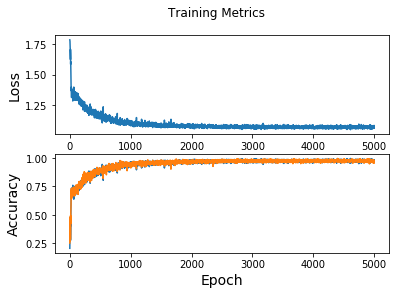

In [12]:
# Initialiser les Placeholders
x = tf.placeholder(tf.float32, shape=(None, 40, 4, 1))
y = tf.placeholder(tf.int64, shape=(None))
dropout_prob = tf.placeholder(tf.float32)
step = tf.placeholder(tf.int64)

#The layers of the neural network
conv_1 = tf.layers.conv2d(inputs= x,filters=4, kernel_size=6, padding="SAME",strides=[1,1], activation=tf.nn.relu)
#pool1 = tf.nn.max_pool(conv_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool1")
conv_2 = tf.layers.conv2d(inputs=conv_1,filters=8, kernel_size=5, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
pool2 = tf.nn.max_pool(conv_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool2")

conv_3 = tf.layers.conv2d(inputs=pool2,filters=16, kernel_size=5, padding="SAME",strides=[1, 1], activation=tf.nn.relu)
conv_4 = tf.layers.conv2d(inputs=conv_3,filters=32, kernel_size=4, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
pool4 = tf.nn.max_pool(conv_4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool4")
shape = pool4.get_shape().as_list()
reshaped = tf.reshape(pool4, shape=[-1, shape[1] * shape[2] * shape[3]])
dense1 = tf.contrib.layers.fully_connected(reshaped, 185 ,activation_fn=tf.nn.relu,scope='dense1')
dropout = tf.nn.dropout(dense1,dropout_prob)
logits = tf.contrib.layers.fully_connected(dropout, 6 ,activation_fn=None,scope='dense2')
softmax = tf.nn.softmax(logits, name = "Out")

with tf.name_scope("Loss"):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=softmax, name=None)
    loss = tf.reduce_mean(cross_entropy)
    
with tf.name_scope("Train"):
    learning_rate = 0.0765 + tf.train.exponential_decay(0.0925,step,5000,1/math.e)
    train_op = tf.train.GradientDescentOptimizer(learning_rate= learning_rate).minimize(loss)
    
with tf.name_scope("accuracy"):
    # Convert logits to label indexes
    prediction = tf.argmax(softmax, 1)
    num_correct_prediction = tf.equal(prediction, y)
    accuracy = tf.reduce_mean(tf.cast(num_correct_prediction, tf.float32))
    
    
## Note: Rerunning this cell uses the same model variables
train_loss_results = []
train_accuracy_results = []
test_accuracy_results = []

# Initilize the Session
sess = tf.Session()

# Initialize the model's variables
sess.run(tf.global_variables_initializer())

data_Train = np.zeros((500,40,4,1), dtype='i')
label_Train = np.zeros((500), dtype='i')
data_Test = np.zeros((500,40,4,1), dtype='i')
label_Test = np.zeros((500), dtype='i')
buff_features = train[0]
buff_label = train[1]
buff2_features = test[0]
buff2_label = test[1]

for i in range(5000):
    ### Votre code
    for j in range(500):
        rand = randint(0,buff_features.shape[0]-1)
        data_Train[j,:,:,:] = buff_features[rand,:,:,:]
        label_Train[j] = buff_label[rand]
        rand = randint(0,buff2_features.shape[0]-1)
        data_Test[j,:,:,:] = buff2_features[rand,:,:,:]
        label_Test[j] = buff2_label[rand]
    
    loss_val, accuracy_val = sess.run([loss,accuracy], feed_dict={x: data_Train, y: label_Train, dropout_prob: 1})
    sess.run(train_op, feed_dict={x: data_Train, y: label_Train, step: i, dropout_prob: 0.75})
     ### Votre Code
    # On récupère le taux de prédiction sur les données test
    test_accuracy_val = sess.run([accuracy], feed_dict={x: data_Test, y: label_Test, dropout_prob: 1})[0]

    print(" Epoch :", i," Loss: ", loss_val," Accuracy: ", accuracy_val," Accuracy Test: ",test_accuracy_val)

    train_loss_results.append(loss_val)
    train_accuracy_results.append(accuracy_val)
    test_accuracy_results.append(test_accuracy_val)
            
# Plot the evolution of loss and train accuracy
fig, axes = plt.subplots(2)
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
axes[1].plot(test_accuracy_results)
plt.show()